Time series data is typically composed of various components that contribute to its overall pattern. The primary time series components are:

-   Trend:

*    The long-term movement or direction in the data.
    It represents the underlying growth or decline in the series over an extended period.
    Trends can be upward, downward, or stable.

-   Seasonality:

*   Regular and predictable patterns that repeat over a specific period, often within a year or a day.
    Seasonal effects are typically associated with calendar-related events, such as holidays or seasons.
    For example, retail sales might exhibit seasonality with increased activity during holiday seasons.

-   Cyclic Patterns:

*   Longer-term patterns that are not as strictly regular as seasonality.
    These patterns may not have a fixed period and can span multiple seasons.
    Cycles are often related to economic or business cycles, with periods of expansion and contraction.

-   Irregular (or Residual) Component:

*   The random and unpredictable fluctuations or noise in the data.
    It represents the variability that cannot be attributed to the trend, seasonality, or cyclic patterns.
    Irregular components are typically what remain after removing the identifiable components through modeling.

Understanding these components is crucial for time series analysis and forecasting. Various time series forecasting models, such as ARIMA and Exponential Smoothing, aim to capture and separate these components to make accurate predictions.

In mathematical terms, a time series (Y) can often be decomposed into these components using an additive or multiplicative model:

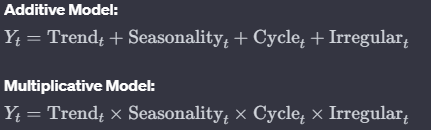

There are numerous time series machine learning algorithms, each designed to address different aspects and patterns within time series data. Here are some common types of time series algorithms:

*   Autoregressive Integrated Moving Average (ARIMA):
Combines autoregression, differencing, and moving averages to model time series data.

*   Seasonal-Trend decomposition using LOESS (STL):
Decomposes a time series into trend, seasonality, and remainder components.

*   Exponential Smoothing State Space Models (ETS):
Models time series data using exponential smoothing.

*   Prophet:
Developed by Facebook for forecasting with daily observations that display patterns on different time scales.

*   Long Short-Term Memory (LSTM) Networks:
A type of recurrent neural network (RNN) that is effective in capturing long-term dependencies in time series data.

*   Gated Recurrent Unit (GRU) Networks:
Another type of recurrent neural network similar to LSTM, designed for simpler and faster training.

*   Support Vector Machines for Time Series (SVM-Time):
Adapts traditional SVMs for time series forecasting.

*   K-Nearest Neighbors (KNN):
Utilizes the k-nearest neighbors algorithm for time series prediction.

*   Random Forests for Time Series:
Adapts the random forests algorithm for time series forecasting.

*   XGBoost and LightGBM:
Gradient boosting algorithms that can be applied to time series forecasting tasks.

*   Theta Method:
A simple forecasting method based on the decomposition of time series into trend, seasonality, and remainder.

* Neural Prophet:
An extension of the Prophet algorithm designed to handle more complex time series patterns.

These algorithms vary in complexity, suitability for different types of time series data, and computational requirements. The choice of algorithm often depends on the specific characteristics of your data and the goals of your time series analysis. Additionally, hybrid approaches that combine multiple algorithms or techniques are common for achieving better forecasting performance.

#### Trend

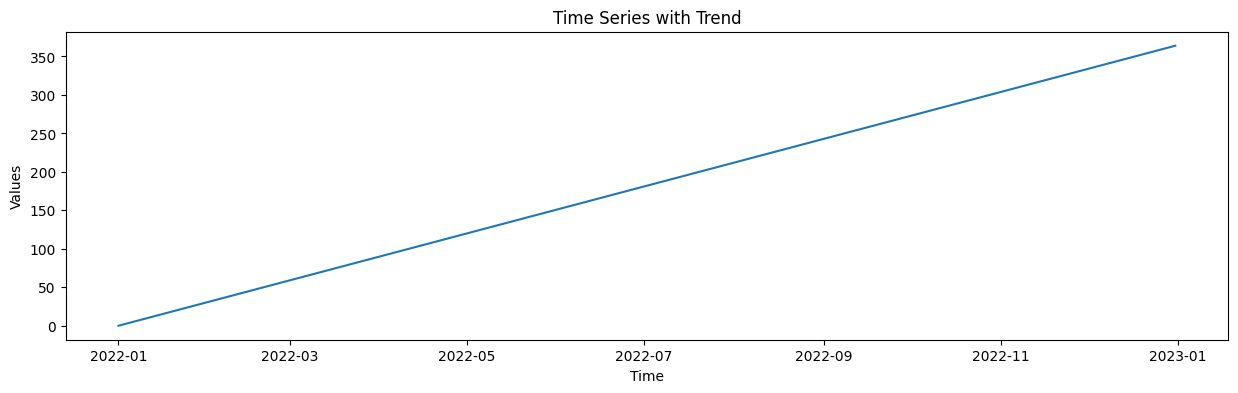

In [5]:
# We create a time series with an upward trend, where values increase over time.
# The plot visually shows the trend, indicating a general rise in values.

import pandas as pd
import numpy as np

# Create a time series with an upward trend
np.random.seed(42)
time_index = pd.date_range('2022-01-01', '2022-12-31', freq='D')
trend_values = np.arange(len(time_index))
time_series_with_trend = pd.Series(trend_values, index=time_index)

# Plot the time series with trend
plt.figure(figsize=(15,4))
plt.plot(time_series_with_trend)
plt.title('Time Series with Trend')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

#### Seasonality

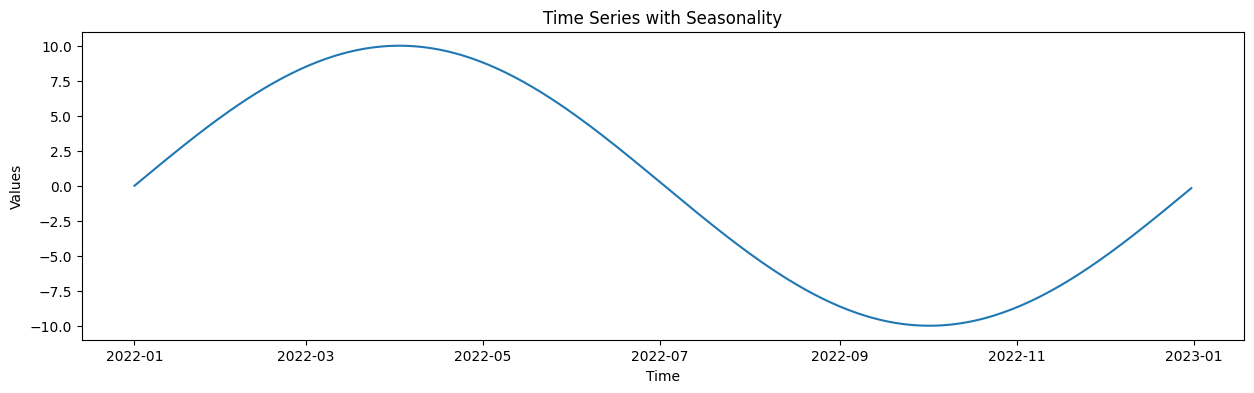

In [7]:
# Create a time series with seasonality
# We create a time series with a sinusoidal seasonality pattern.
# The plot visually shows regular up-and-down patterns, representing seasonality.
seasonal_values = np.sin(2 * np.pi * np.arange(len(time_index)) / 365) * 10
time_series_with_seasonality = pd.Series(seasonal_values, index=time_index)

# Plot the time series with seasonality
plt.figure(figsize=(15,4))
plt.plot(time_series_with_seasonality)
plt.title('Time Series with Seasonality')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

#### Cyclic Patterns

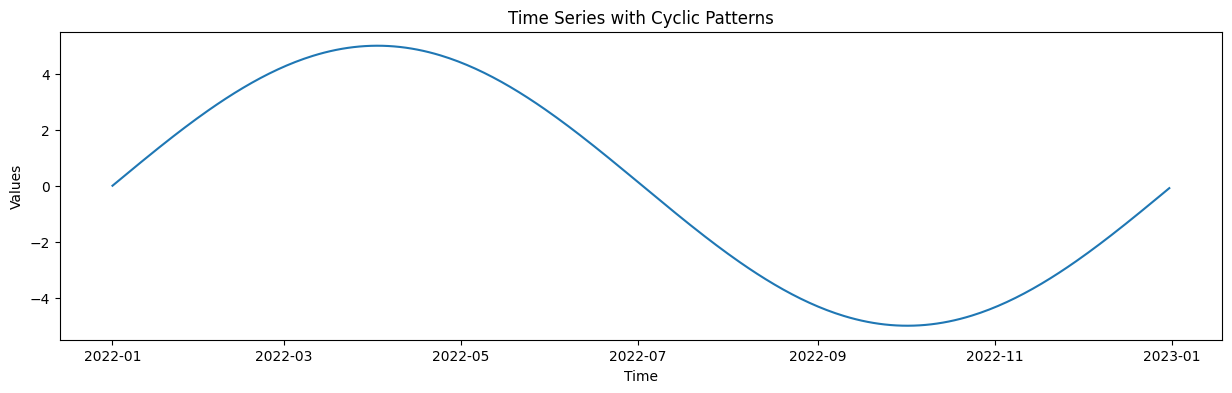

In [8]:
# Create a time series with cyclic patterns
cyclic_values = np.sin(2 * np.pi * np.arange(len(time_index)) / 365) * 5
time_series_with_cyclic = pd.Series(cyclic_values, index=time_index)

# Plot the time series with cyclic patterns
plt.figure(figsize=(15,4))
plt.plot(time_series_with_cyclic)
plt.title('Time Series with Cyclic Patterns')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()


#### Irregular Component

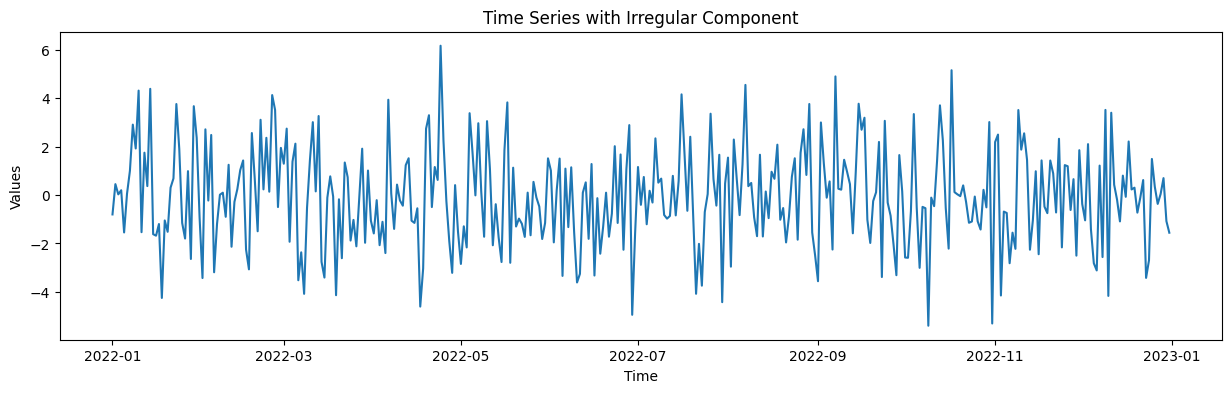

In [10]:
# Create a time series with an irregular component
irregular_values = np.random.normal(0, 2, len(time_index))
time_series_with_irregular = pd.Series(irregular_values, index=time_index)

# Plot the time series with irregular component
plt.figure(figsize=(15,4))
plt.plot(time_series_with_irregular)
plt.title('Time Series with Irregular Component')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

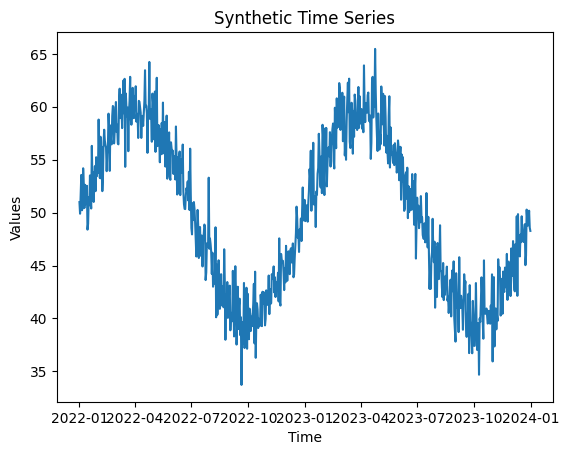

c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\sengu\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


ValueError: Invalid state space initialization method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Generate synthetic time series data with a clear seasonal pattern
np.random.seed(42)
time_index = pd.date_range('2022-01-01', '2023-12-31', freq='D')
seasonal_pattern = np.sin(2 * np.pi * np.arange(len(time_index)) / 365) * 10
synthetic_data = 50 + seasonal_pattern + np.random.normal(0, 2, len(time_index))

# Create a DataFrame
df = pd.DataFrame({'Date': time_index, 'Value': synthetic_data})
df.set_index('Date', inplace=True)

# Plot the synthetic time series
plt.plot(df['Value'])
plt.title('Synthetic Time Series')
plt.xlabel('Time')
plt.ylabel('Values')
plt.show()

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# SARIMA Model with initial parameter estimates
order = (1, 1, 1)  # Non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 365)  # Seasonal order (P, D, Q, S)
initial_params = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]  # Initial parameter estimates
model = SARIMAX(train_data['Value'], order=order, seasonal_order=seasonal_order, initialization='approximate', initial_params=initial_params)

# Fit the SARIMA model to the training data
result = model.fit()

# Forecast future values using the trained SARIMA model
forecast_steps = len(test_data)
forecast = result.get_forecast(steps=forecast_steps)

# Plot the training data, actual values, and forecasted values
plt.plot(train_data['Value'], label='Training Data')
plt.plot(test_data['Value'], label='Actual Values', linestyle='--')
plt.plot(forecast.predicted_mean, label='Forecasted Values', linestyle='--', color='red')
plt.title('SARIMA Forecasting')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()